In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


In [3]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, precision_recall_curve,accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
#Looking for null values
print("Null values :: ")
print(df.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
df.shape

(303, 14)

In [10]:
for i in df.columns:
    Q1,Q3 = np.quantile(df[i],[0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - (1.5*IQR)
    if lower_bound < 0:  # as in whole dataset there is no -ve value hence we set lowerbound to 0
        lower_bound=0
    upper_bound = Q3 + (1.5*IQR)
    print(i)
    print('Lower Bound =',np.round(lower_bound,2),' Upper Bound =',np.round(upper_bound,2))
    print('min value =',df[i].min(), ' max value =', df[i].max())

    if df[i].min() < lower_bound:
        print('negative Outliers',len(df[(df[i]<lower_bound)]))
    
    if df[i].max() > upper_bound:
        print('positive Outliers', len(df[(df[i]>upper_bound)]))  
        
   
        
       
    
    print('='*50)

age
Lower Bound = 27.25  Upper Bound = 81.25
min value = 29  max value = 77
sex
Lower Bound = 0  Upper Bound = 2.5
min value = 0  max value = 1
cp
Lower Bound = 0  Upper Bound = 5.0
min value = 0  max value = 3
trestbps
Lower Bound = 90.0  Upper Bound = 170.0
min value = 94  max value = 200
positive Outliers 9
chol
Lower Bound = 115.75  Upper Bound = 369.75
min value = 126  max value = 564
positive Outliers 5
fbs
Lower Bound = 0.0  Upper Bound = 0.0
min value = 0  max value = 1
positive Outliers 45
restecg
Lower Bound = 0  Upper Bound = 2.5
min value = 0  max value = 2
thalach
Lower Bound = 84.75  Upper Bound = 214.75
min value = 71  max value = 202
negative Outliers 1
exang
Lower Bound = 0  Upper Bound = 2.5
min value = 0  max value = 1
oldpeak
Lower Bound = 0  Upper Bound = 4.0
min value = 0.0  max value = 6.2
positive Outliers 5
slope
Lower Bound = 0  Upper Bound = 3.5
min value = 0  max value = 2
ca
Lower Bound = 0  Upper Bound = 2.5
min value = 0  max value = 4
positive Outliers 2

In [11]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(df))
df1 = df[(z<3).all(axis=1)]
df1.shape

(287, 14)

In [12]:
#we have one duplicate row.
#Removing the duplicate row
df1 = df1.drop_duplicates()
duplicate_rows = df1[df1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row
df1.shape

Number of duplicate rows ::  (0, 14)


(287, 14)

Text(0.5, 1.0, 'Pearson Correlation')

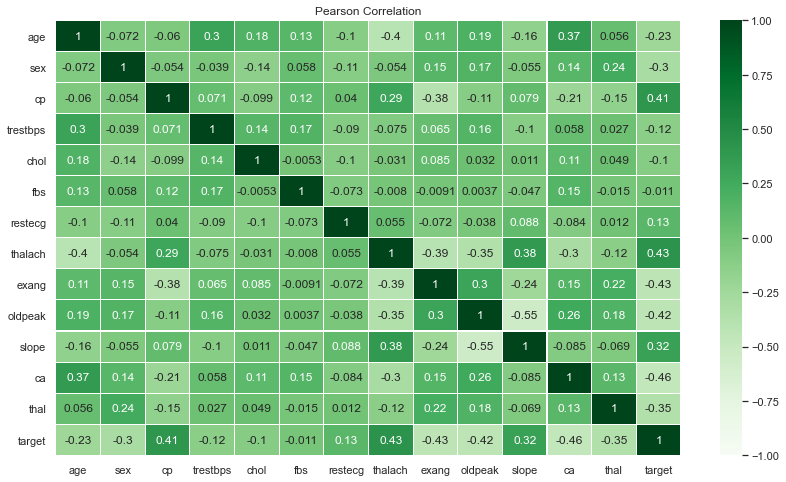

In [13]:
#Finding the correlation between variables
pearsonCorr = df1.corr(method='pearson')
spearmanCorr = df1.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

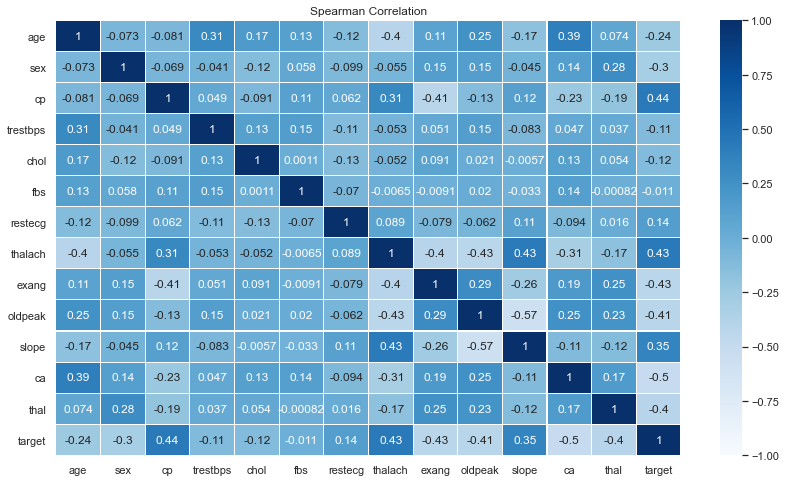

In [14]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

## Feature Selection

In [15]:
X= df1.drop('target',axis= 1)
y = df1['target']


In [16]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((200, 13), (87, 13))

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

1

In [19]:
corr_features

{'slope'}

In [20]:
X= df1.drop('slope',axis =1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((200, 13), (87, 13))

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 10 features
select_feature = SelectKBest(chi2, k=10).fit(X_train, y_train)
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feature_chi2 = X_train.columns[select_feature.get_support()]
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature_chi2)))
print('Chosen best 10 feature by Chi2:',selected_feature_chi2)

total features: 13
selected features: 10
Chosen best 10 feature by Chi2: Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca',
       'thal', 'target'],
      dtype='object')


In [24]:
Final_df= df1[['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'ca',
       'thal', 'target']]
Final_df

,age,sex,cp,trestbps,thalach,exang,oldpeak,ca,thal,target
0,63,1,3,145,150,0,2.3,0,1,1
1,37,1,2,130,187,0,3.5,0,2,1
2,41,0,1,130,172,0,1.4,0,2,1
3,56,1,1,120,178,0,0.8,0,2,1
4,57,0,0,120,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,123,1,0.2,0,3,0
299,45,1,3,110,132,0,1.2,0,3,0
300,68,1,0,144,141,0,3.4,2,3,0
301,57,1,0,130,115,1,1.2,1,3,0


In [25]:
Final_df.to_csv("Clean_heart.csv")